In [ ]:
!pip install pycaret
!pip install jinja2
!pip install markupsafe==2.0.1
!pip install shap

# Business Objective

For any business to stay relevant it comes to managing their sales force.  As companies scale up, one challenge becomes is what customers to contact from lead generation without wasting resources.

On the other side management wants to understand how the reps are performing and if they have good leads that can get them to meet their quota from Month, Quarter and Year perspective.

## Data Background

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating, etc. ) in order to get a higher lead conversion.

X Education wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score h have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data Variables

Variables Description

Prospect ID - A unique ID with which the customer is identified.

Lead Number - A lead number assigned to each lead procured.

Lead Origin - The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.

Lead Source - The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

Do Not Email -An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.

Do Not Call - An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.

Converted - The target variable. Indicates whether a lead has been successfully converted or not.

TotalVisits - The total number of visits made by the customer on the website.
Total Time Spent on Website - The total time spent by the customer on the website.

Page Views Per Visit - Average number of pages on the website viewed during the visits.

Last Activity - Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.

Country - The country of the customer.

Specialization - The industry domain in which the customer worked before.

Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.

How did you hear about X Education - The source from which the customer heard about X Education.

What is your current occupation - Indicates whether the customer is a student, umemployed or employed.

What matters most to you in choosing this course An option selected by the customer - indicating what is their main motto behind doing this course.
Search - Indicating whether the customer had seen the ad in any of the listed items.

Magazine 

Newspaper 

Article

X Education Forums

Newspaper

Digital 

Advertisement

Through Recommendations - Indicates whether the customer came in through recommendations.

Receive More Updates About Our Courses - Indicates whether the customer chose to receive more updates about the courses.

Tags - Tags assigned to customers indicating the current status of the lead.
Lead Quality - Indicates the quality of lead based on the data and intuition the employee who has been assigned to the lead.

Update me on Supply Chain Content - Indicates whether the customer wants updates on the Supply Chain Content.

Get updates on DM Content - Indicates whether the customer wants updates on the DM Content.

Lead Profile - A lead level assigned to each customer based on their profile.
City - The city of the customer.

Asymmetric Activity Index - An index and score assigned to each customer based on their activity and their profile Asymmetric Profile Index, Asymmetric Activity Score and Asymmetric Profile Score.

I agree to pay the amount through cheque - Indicates whether the customer has agreed to pay the amount through cheque or not.

a free copy of Mastering The Interview - Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.

Last Notable Activity - The last notable activity performed by the student.

## Importing Libraries

In [22]:
import numpy as np
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
import pandas as pd
pd.set_option('display.max_rows', None) #all columns
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Importing Data to Google Colab
from google.colab import files
uploaded = files.upload()
import io
train = pd.read_csv(io.BytesIO(uploaded['Lead Scoring.csv']))

Saving Lead Scoring.csv to Lead Scoring (1).csv


### Functions

In [3]:
# missing value function
def missing_values(data):
  null_cols = pd.DataFrame(data.isnull().sum().sort_values(ascending=False), columns=['Null Data Count'])
  null_cols_pct = pd.DataFrame(round(data.isnull().sum().sort_values(ascending=False)/len(data),2)*100, columns=['Null Data Pct'])

  # Combine horizontally (axis=1) into a dataframe with column names (keys=[]) then to a data frame
  null_cols_df = pd.DataFrame(pd.concat([null_cols, null_cols_pct], axis=1))
  all_nulls = null_cols_df[null_cols_df['Null Data Pct']>0]

  print('There are', len(all_nulls), 'columns with missing values.')
  print("*" * 45)
  print(all_nulls)

  print("*" * 45)
  print("*" * 45)
  print("*" * 45)
  #visualize the missing values features in bar chart
  plt.figure(figsize=(12,8))

  # Create plot
  sns.barplot(x=all_nulls.index, y='Null Data Pct', data=all_nulls)

  # Set plot features
  plt.xticks(rotation='90')
  plt.xlabel('Features', fontsize=15)
  plt.ylabel('Percent of Missing Values', fontsize=15)
  plt.title('Percent of Missing Data by Feature', fontsize=15)

## Exploratory Data Analysis

Based on the current method of leads entering the pipeline 38.53% are converting to sales.  Which means 3560 sales are being converted, which 5,680 are wasting the Sales reps time. 

Our goal with lead scoring is to figure out how to identify the 3,560 customers that will convert to sales thus reducing time spent on non revenue generating customers.

In [11]:
total_lead_conversion = train['Converted'].sum()

In [14]:
print(total_lead_conversion/9240 * 100)

38.53896103896104


In [15]:
print(.3853 * 9240)

3560.1719999999996


In [8]:
train.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are 16 columns with missing values.
*********************************************
                                               Null Data Count  Null Data Pct
Lead Quality                                              4767           52.0
Asymmetrique Activity Index                               4218           46.0
Asymmetrique Profile Score                                4218           46.0
Asymmetrique Activity Score                               4218           46.0
Asymmetrique Profile Index                                4218           46.0
Tags                                                      3353           36.0
Lead Profile                                              2709           29.0
What matters most to you in choosing a course             2709           29.0
What is your current occupation                           2690           29.0
Country                                                   2461           27.0
How did you hear about X Education                    

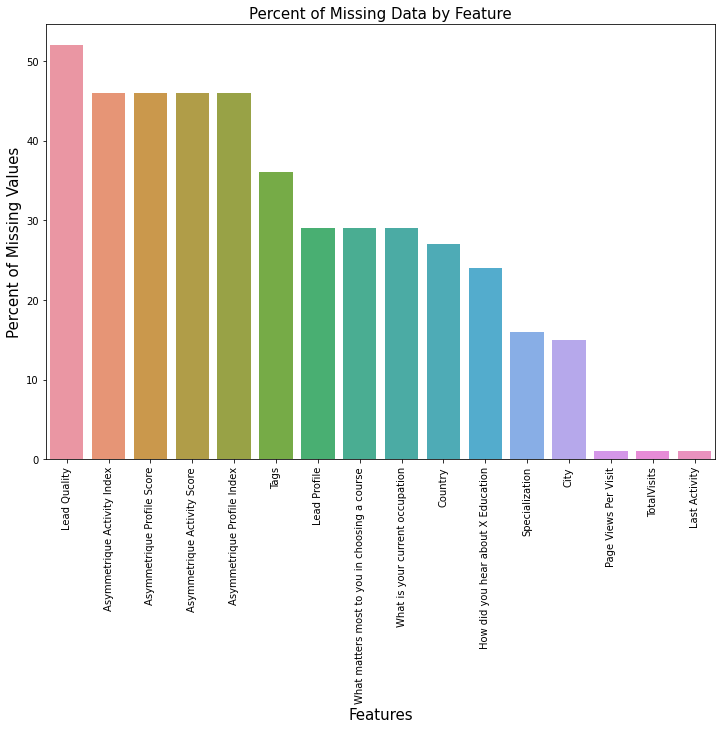

In [4]:
print(missing_values(train))

In [24]:
train_df = train.dropna(axis=0, inplace=True)

In [ ]:
#train_df['Converted'] = train_df['Converted'].replace({1 : 'Yes', 0 : 'No'})

In [ ]:
# plotly visual
#import plotly.express as px

#fig = px.scatter(x=train_df['Total Time Spent on Website'], y=train_df['Asymmetrique Activity Score'], 
                 #color = train_df['Converted'], template = 'plotly_white', 
                 #facet_col = train_df['Lead Origin'], facet_row = train_df['Do Not Email'],
                 #title = 'Lead Conversion by Total time spent on Website, Activity Score and Lead Origin',
                 #labels = {'x' : 'Total Time Spent on Website', 'y' : 'Activity Score'})
                
#fig.show()

In [27]:
# init setup
from pycaret.classification import *
s = setup(train, target = 'Converted', ignore_features = ['Prospect ID', 'Lead Number'])

,Description,Value
0,session_id,2682
1,Target,Converted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1943, 37)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,29
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Prospect ID',
                                                       'Lead Number'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Converted',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrou

In [28]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9551,0.9855,0.9506,0.9677,0.9589,0.9095,0.9100,0.371
lr,Logistic Regression,0.9529,0.9850,0.9573,0.9584,0.9572,0.9049,0.9063,1.094
lda,Linear Discriminant Analysis,0.9544,0.9843,0.9667,0.9521,0.9591,0.9076,0.9083,0.058
lightgbm,Light Gradient Boosting Machine,0.9493,0.9821,0.9520,0.9564,0.9538,0.8975,0.8983,0.287
rf,Random Forest Classifier,0.9507,0.9813,0.9440,0.9661,0.9546,0.9008,0.9016,0.549
ada,Ada Boost Classifier,0.9456,0.9803,0.9453,0.9561,0.9504,0.8901,0.8908,0.175
et,Extra Trees Classifier,0.9507,0.9797,0.9453,0.9646,0.9546,0.9008,0.9014,0.551
nb,Naive Bayes,0.9235,0.9500,0.9092,0.9510,0.9290,0.8462,0.8484,0.023
dt,Decision Tree Classifier,0.9294,0.9287,0.9360,0.9367,0.9360,0.8573,0.8580,0.027
knn,K Neighbors Classifier,0.7316,0.7689,0.7596,0.7551,0.7568,0.4574,0.4582,0.131


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2682, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


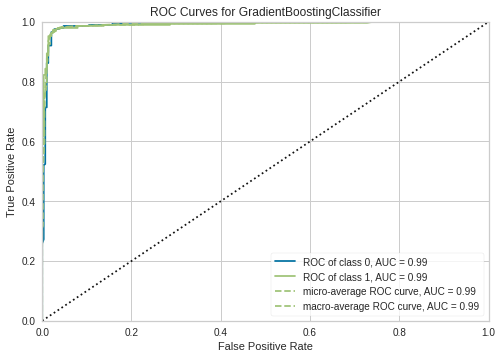

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [29]:
# AUC Plot
plot_model(best_model, plot = 'auc')

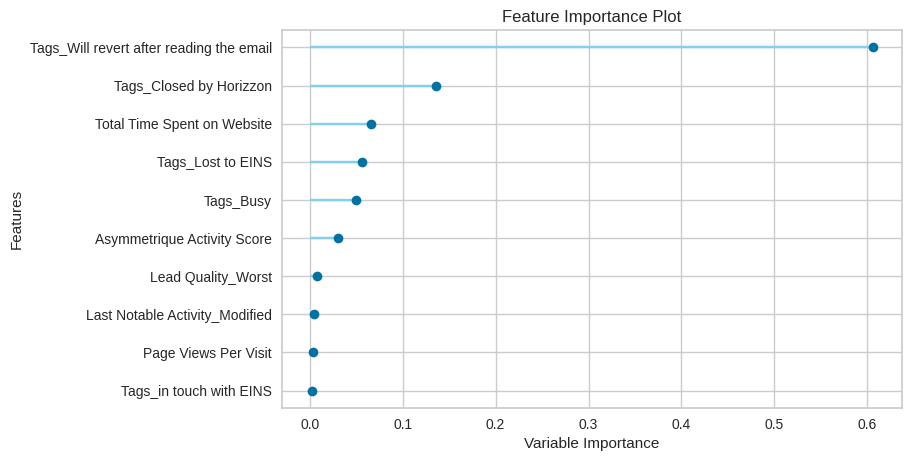

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [35]:
# Feature Importance
plot_model(best_model, plot = 'feature')

## Model hypertuning

In [40]:
s = setup(train, target = 'Converted', ignore_features = ['Prospect ID', 'Lead Number'], remove_outliers=True, feature_interaction=True, feature_selection=True)

,Description,Value
0,session_id,2913
1,Target,Converted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1943, 37)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,29
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Prospect ID',
                                                       'Lead Number'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Converted',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_...
                                                    n_jobs=-1,
                                                

In [41]:
best_model2 = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9566,0.9850,0.9523,0.9649,0.9583,0.9132,0.9139,1.867
ridge,Ridge Classifier,0.9543,0.0000,0.9598,0.9544,0.9565,0.9084,0.9096,0.092
et,Extra Trees Classifier,0.9543,0.9849,0.9539,0.9596,0.9562,0.9085,0.9097,0.563
lda,Linear Discriminant Analysis,0.9536,0.9726,0.9524,0.9596,0.9556,0.9069,0.9078,0.170
lightgbm,Light Gradient Boosting Machine,0.9504,0.9832,0.9434,0.9615,0.9520,0.9008,0.9017,0.517
ada,Ada Boost Classifier,0.9497,0.9786,0.9508,0.9539,0.9517,0.8992,0.9005,0.466
rf,Random Forest Classifier,0.9481,0.9849,0.9419,0.9587,0.9498,0.8962,0.8972,0.629
nb,Naive Bayes,0.9419,0.9607,0.9390,0.9505,0.9441,0.8837,0.8850,0.036
lr,Logistic Regression,0.9389,0.9690,0.9360,0.9473,0.9411,0.8775,0.8786,0.757
dt,Decision Tree Classifier,0.9241,0.9239,0.9300,0.9258,0.9275,0.8480,0.8488,0.092


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2913, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [43]:
model1 = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9462,0.9784,0.9559,0.9420,0.9489,0.8920,0.8921
1,0.9769,0.9979,0.9706,0.9851,0.9778,0.9538,0.9539
2,0.9767,0.9981,0.9701,0.9848,0.9774,0.9534,0.9536
3,0.9690,0.9865,0.9403,1.0000,0.9692,0.9380,0.9398
4,0.9225,0.9721,0.9552,0.9014,0.9275,0.8444,0.8460
5,0.9767,0.9923,0.9552,1.0000,0.9771,0.9535,0.9545
6,0.9612,0.9836,0.9403,0.9844,0.9618,0.9225,0.9235
7,0.9535,0.9887,0.9403,0.9692,0.9545,0.9069,0.9074
8,0.9380,0.9599,0.9254,0.9538,0.9394,0.8759,0.8764


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2913, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [44]:
tuned_model_gbc = tune_model(model1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9462,0.9758,0.9559,0.9420,0.9489,0.8920,0.8921
1,0.9769,0.9967,0.9706,0.9851,0.9778,0.9538,0.9539
2,0.9767,0.9974,0.9701,0.9848,0.9774,0.9534,0.9536
3,0.9690,0.9851,0.9403,1.0000,0.9692,0.9380,0.9398
4,0.9225,0.9721,0.9552,0.9014,0.9275,0.8444,0.8460
5,0.9845,0.9925,0.9701,1.0000,0.9848,0.9690,0.9694
6,0.9612,0.9851,0.9403,0.9844,0.9618,0.9225,0.9235
7,0.9612,0.9901,0.9701,0.9559,0.9630,0.9223,0.9224
8,0.9302,0.9682,0.9254,0.9394,0.9323,0.8603,0.8604


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=11,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2913, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [45]:
#evaluate model
evaluate_model(tuned_model_gbc)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=11,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2913, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…